## Project Title: Marketing Campaign for Banking Products

### Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).

Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

### Context:
The bank has a growing customer base. The bank wants to increase borrowers (asset
customers) base to bring in more loan business and earn more through the interest on
loans. So , the bank wants to convert the liability based customers to personal loan
customers. (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. The
department wants you to build a model that will help them identify the potential
customers who have a higher probability of purchasing the loan. This will increase the
success ratio while at the same time reduce the cost of the campaign.

### Objective:
**The classification goal is to predict the likelihood of a liability customer buying personal
loans.**


### IMPORTING LIBRARIES

#### IMPORTING ALL THE REQUIRED LIBRARIES

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as m
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn import model_selection
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**NOTE:**  %matplotlib inline in above code snippet allows us to view our graphs in jupyter notebook/colaboratory itself.

### REGARDING DATASET

#### READING CSV FILE
#### Reading .csv file from the current working directory

In [2]:
# Reading csv file

ds = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

#### Printing all the keys in the dataset

In [3]:
# Printing keys

ds.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

### INFORMATION ABOUT FEATURES OR ATTRIBUTES

The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

> **Personal Loan** - Did this customer accept the personal loan offered in the last campaign? This is our target variable

> **Securities Account** - Does the customer have a securities account with the bank?

> **CD Account** - Does the customer have a certificate of deposit (CD) account with the bank?

> **Online** - Does the customer use internet banking facilities?

> **Credit Card** - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

> **Age** - Age of the customer

> **Experience** - Years of experience

> **Income** - Annual income in dollars

> **CCAvg** - Average credit card spending

> **Mortage** - Value of House Mortgage

Ordinal Categorical Variables are:

> **Family** - Family size of the customer

> **Education** - education level of the customer

The nominal variable is :

> **ID**

> **Zip Code**

### CONVERSION OF DATASET INTO DATAFRAME USING PANDAS LIBRARY

#### In the below cell, head() determines the first 5 rows of the dataframe

In [4]:
# Converting into Data Frame 

bank_df = pd.DataFrame(ds)

# Printing first 5 rows of the data frame
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### In the below cell, tail() determines the last 5 rows of the dataframe

In [5]:
# Printing last 5 rows of the data frame

bank_df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#### In the below cell, sample() determines the randomly selected rows of the dataframe

In [6]:
# Printing any of the 10 rows in the data frame

bank_df.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1871,1872,31,5,99,94065,4,1.8,2,268,0,0,0,0,0
4748,4749,43,18,38,94309,1,0.5,3,144,0,0,0,1,0
4634,4635,42,17,29,94928,1,0.6,3,0,0,0,0,1,0
571,572,35,9,53,94143,4,2.2,2,0,0,0,0,1,0
2905,2906,64,40,8,94110,2,0.3,3,0,0,0,0,1,0
2872,2873,50,26,23,92630,1,0.3,1,0,0,0,0,0,0
2180,2181,58,33,42,91380,2,1.6,3,0,0,0,0,1,0
4142,4143,57,32,70,90024,3,1.6,3,0,0,0,0,0,0
432,433,43,17,91,91311,1,5.7,1,0,0,0,0,1,0
3973,3974,61,35,53,90064,1,2.8,2,167,0,0,0,1,0


#### Printing columns in the dataframe

In [7]:
# Printing columns in the data

bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

### CHECKING DATATYPE

#### Checking datatype is useful when we are working with the data. If there are any necessary changes like we need to change the datatype, we have to make changes.

In [8]:
# Checking the Data type of the data

bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### STATISTICAL SUMMARY

#### Statistical summary can be well displayed through describe() function

#### describe() function lets to know count, mean, standard deviation, minimum value, maximum value etc. I have used it below.

In [9]:
# Using describe() function to get all the statistical summary of the data

bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#### The below cell is eye balling the data, which is the transpose of above describe() function data

In [10]:
# Eye balling the data
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### The below cell shows info() function.

#### Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the dataframe.info() function.

In [11]:
# Using info() function for an overview

bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Shape of the dataframe. 
 
#### dataframe.shape prints, number of rows and columns in the data frame

In [12]:
# Checking the shape of the data

bank_df.shape

(5000, 14)

#### Finding NULL Values in the data

#### Pandas dataframe.isna() function is used to detect missing values. It return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. 

#### sum() function is used to sum all the null values in that particular columns

In [13]:
# Checking if there are any null values in the data

bank_df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### CLEANING THE DATA

#### The below cell shows, correlation between Age and Experience columns

In [14]:
#Correlating the age and experience for removing experience as it has negative values i.e, noise in the data

exp = bank_df['Experience']
age = bank_df['Age']
correlation = exp.corr(age)
correlation

0.9942148569683321

#### Observation:
**Above column shows 99% of correlation between Age and Experience columns. As there are negative values present in the Experience column, it is considered as noise in the dataframe. Hence we can drop the Experience column**

#### Below cell shows dropping unnecessary columns 

#### From the above observation, we can drop Experience column and as there is no use of ID column in our model building or any other steps, we can drop the ID column from our dataframe

In [15]:
# Dropping unnecessary columns

bank_df = bank_df.drop(['ID','Experience'], axis = 1)

In [16]:
# Checking whether, Experience and ID columns removed or not
bank_df.sample(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1136,47,65,94086,1,1.50,2,0,0,1,0,1,0
1438,63,90,94105,4,1.90,2,106,0,1,0,1,0
3010,25,72,94301,3,0.80,1,0,0,0,0,1,0
1906,42,98,92866,2,0.40,1,275,0,0,0,1,0
928,35,74,90638,4,1.30,1,0,0,0,0,1,0
4882,43,73,94301,3,2.33,1,0,0,1,1,1,1
2254,46,53,90025,2,1.70,1,109,0,0,0,0,0
1747,29,21,90717,4,0.40,2,89,0,0,0,0,1
1245,46,41,94025,1,1.40,3,128,0,0,0,1,0
1842,53,93,95051,1,2.70,2,256,0,0,0,1,0


In [17]:
bank_df.describe()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### EXPLORATORY DATA ANALYSIS

#### Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

#### Number of unique values in the each column

In [18]:
bank_df.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

#### In the below cell, ZIP code column has 467 unique values which is huge data and is also a nominal data. ZIP code column can also be not used in any other calculation. So, it can be dropped.

In [19]:
bank_df = bank_df.drop(['ZIP Code'], axis = 1)
bank_df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


#### Number of people with zero mortgage


In [20]:
(bank_df['Mortgage'] == 0).sum()

3462

#### Number of people with zero Credit Card Average

In [21]:
#sum(bank_df['CCAvg'] == 0)
(bank_df['CCAvg'] == 0).sum()

106

#### **Value counts of all categorical columns**

#### **Categorical Columns are:**
1. Education
2. Personal Loan
3. Securities Account
4. CD Account

In [22]:
# Education
bank_df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [23]:
# Personal Loan
bank_df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [24]:
# Securities Account
bank_df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [25]:
# CD Account
bank_df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

### **UNIVARIATE ANALYSIS**

### **Studying Data distribution for numerical data**

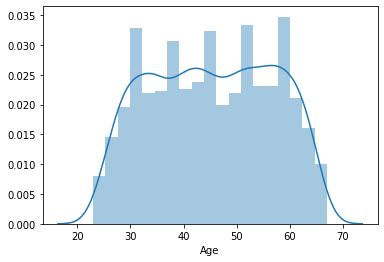

In [26]:
# Age
sns.distplot(bank_df['Age'])
plt.show()

#### Observation:
**From the above graph, we can see that age column is well skewed to center and there are no outliers also which are to be removed. It is the histogram showing all the data plotted correctly.**

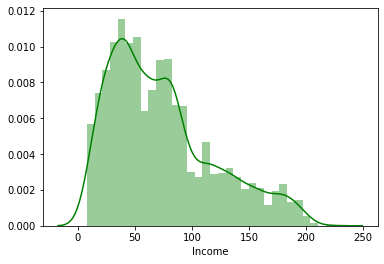

In [27]:
# Income seems right skewness
sns.distplot(bank_df['Income'], color = 'g')
plt.show()

#### Observation:
**From the above graph, we can see the Income column data plotted and is right skewed. This means there is a chance of outliers and should be removed so that the data in the Income column can be converted to Normal distribution.**

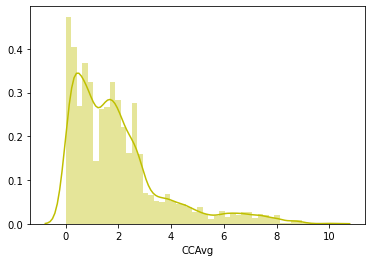

In [28]:
# CCAvg seems right skewness
sns.distplot(bank_df['CCAvg'], color = 'y')
plt.show()

#### Observation:
**From the above graph, we can see the CCAverage column plotted and is right skewed. This means there is a chance of outliers and should be removed so that the data in the CCAverage column can be converted to Normal distribution**

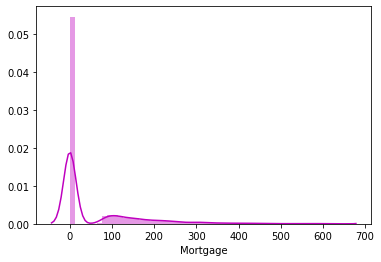

In [29]:
#  Mortgage
sns.distplot(bank_df['Mortgage'], color = 'm')
plt.show()

#### Observation:
**From the above graph, we can see the Mortgage column plotted and is right skewed. This means there is a chance of outliers and should be removed so that the data in the Mortgage column can be converted to Normal distribution**

### **Studying Data distribution on categorical data**

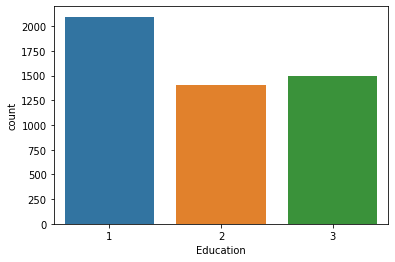

In [30]:
# Education

names = ["Undergraduate", "Graduate","Professional"]
edu = bank_df['Education']
sns.countplot(edu)
plt.show()

#### Observation:
**From the above graph, we can see the count plot of number of customers from undergraduation, graduation and professional educational background**

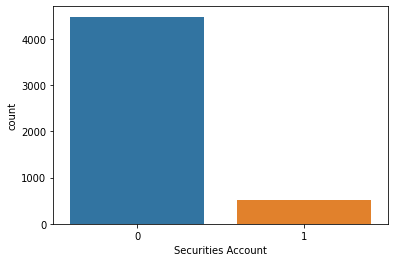

In [31]:
# Securities Account

sns.countplot(bank_df['Securities Account'])
plt.show()

#### Observation:
**From the above graph, we can see the count plot of number of customers who have securities account and who does not have securities account**

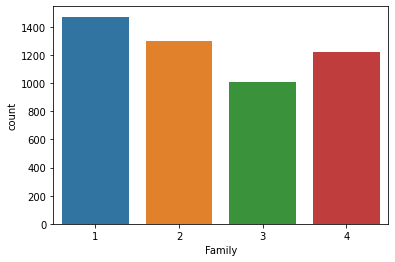

In [32]:
# Family

sns.countplot(bank_df['Family'])
plt.show()

#### Observation:
**From the above graph, we can see the count plot of number of family members in the entire data**

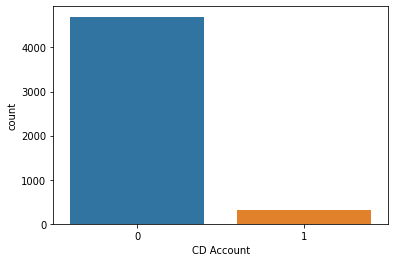

In [33]:
# CD Account

sns.countplot(bank_df['CD Account'])
plt.show()

#### Observation:
**From the above graph, we can see the count plot of number of customers who have CD Account and who does not have CD Account**

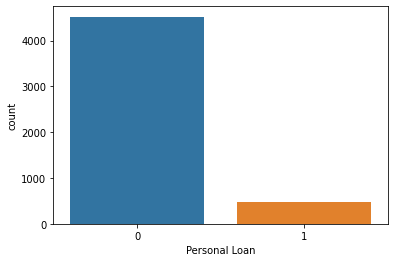

In [34]:
# Our target variable Personal Loan
sns.countplot(bank_df['Personal Loan'])
plt.show()

#### Observation:
**From the above graph, we can see the count plot of number of customers who have personal loans and who does not have personal loans**

### Correlation heat map of  all the columns

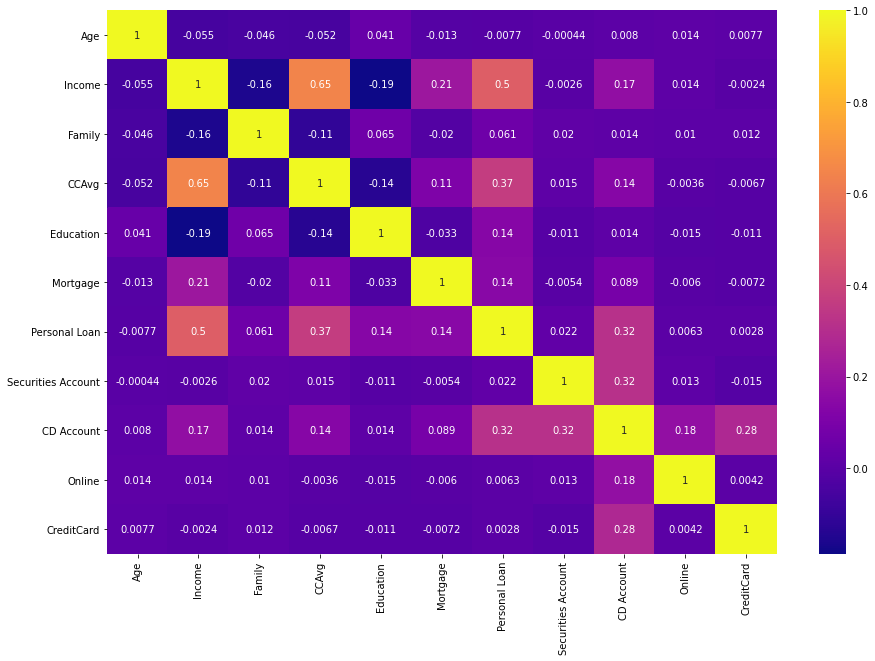

In [35]:
#correlation heat map 
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(bank_df.corr(), cmap = "plasma", annot = True);

#### Observation:
**From the above heat map, we can see there is high correlation between,**
1. Income and CCAvg - Moderate
2. Income and Personal Loan - Moderate
3. CCAvg and Personal Loan - Light

**We can have a bivariate analysis of above highly correlated columns along with Education, Mortgage and CD Account also**

### **BIVARIATE ANALYSIS**


### **Studying data distribution in each required attribute with target variable and attaining statistical result**

### **Influence of income and education on personal loan**

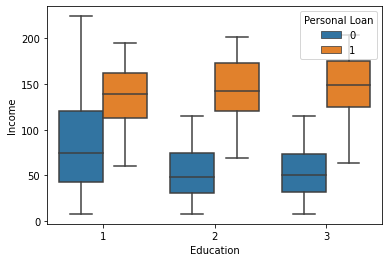

In [36]:
x = bank_df['Education']
y = bank_df['Income']
sns.boxplot(x, y, hue = bank_df['Personal Loan'], data = bank_df)
plt.show()

#### Observation: 
**From the above box plot, Undergraduates who do not have personal loan have more income, where for eduational level 2 and 3 have same income level who have personal loan.**

### **Influence of Mortgage and education on personal loan**

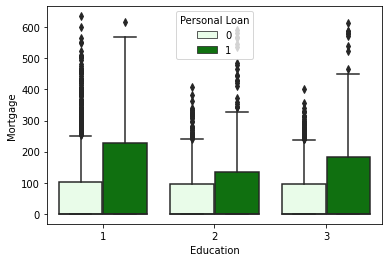

In [37]:
x = bank_df['Education']
y = bank_df['Mortgage']
sns.boxplot(x, y, hue = bank_df['Personal Loan'], data = bank_df, color = 'g')
plt.show()

#### **Observation:** 
**From the above box plot, Undergraduates who do not have personal loan have more income, where for eduational level 2 and 3 have same income level who have personal loan.**

### **Comparing personal loan customers with no.of family members**

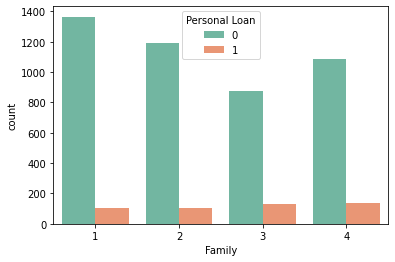

In [38]:
sns.countplot(x = bank_df['Family'], hue = bank_df['Personal Loan'], palette = 'Set2')

#### **Observation:** 
**Above graph shows that family size 3 or more than 3 are more likely to have personal loans. This is most considerable data for making necessary conclusions at business understanding.**

### **Influence of CD Account for personal loan**


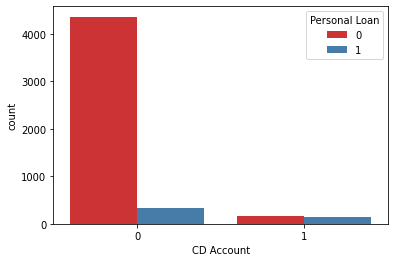

In [39]:
sns.countplot(x = bank_df['CD Account'], hue = bank_df['Personal Loan'], data = bank_df, palette = "Set1")
plt.show()

#### **Observation:** 
**From the above graph, we can see that customers having CD Account have more loans than who have CD Accounts.**

### **MULTIVARIATE ANALYSIS**

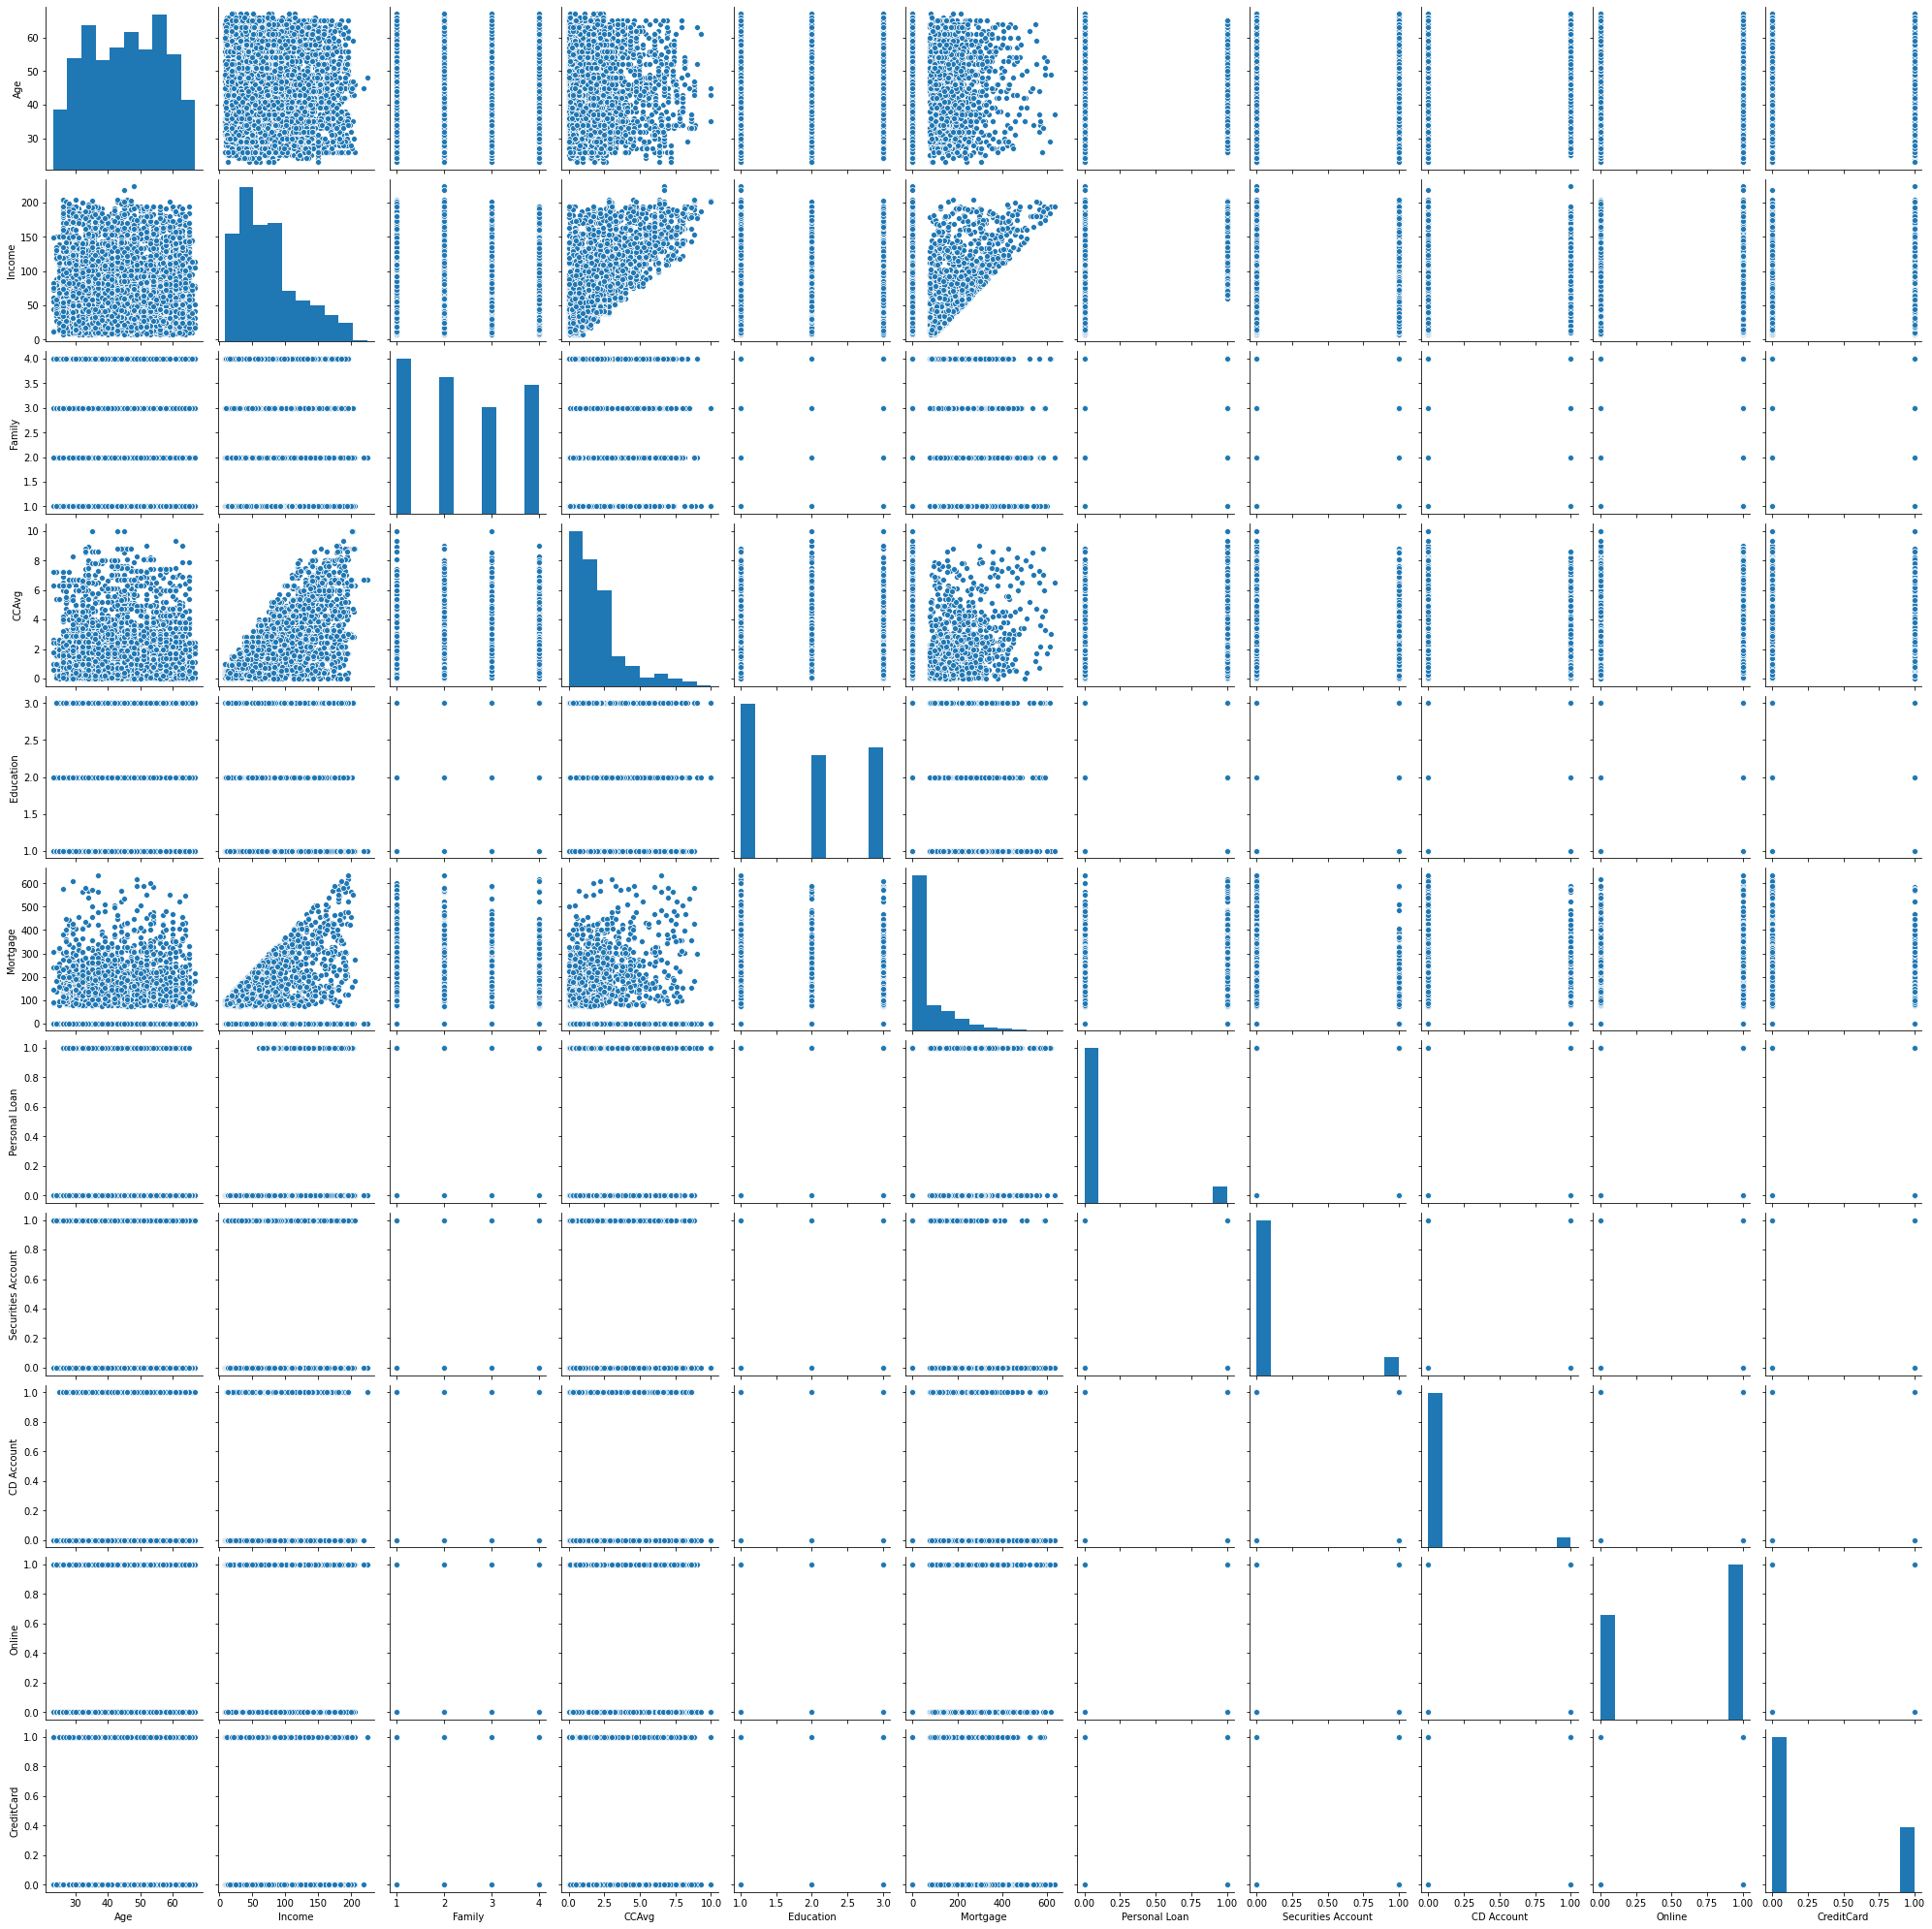

In [40]:
# Representing all the data uniquely
sns.pairplot(bank_df.iloc[:,:])
plt.show()

#### Observation:
**From the above pairplot, scatter plotting and histogram plotting of all the columns relating two different columns in a subplot.**

**From the histogram plotting of numerical data, we can see that data is accordingly plotted with skewness and mostly of right skewness except for age column. For categorical data it is plotted as bars.**

**From the scatter plotting of numerical data, we can see the data is distributed evenly but with outliers.**

**So, from this pairplot we can conclude that outliers must be removed and then build the models.**

* Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

* Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

* Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

* CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

* Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

* The variables family and education are ordinal variables. The distribution of families is evenly distributes

### TRANSFORMATIONS FOR THE FEATURE VARIABLES

### **Using box-cox transformation method** 

In [41]:
# Transformations for Income values using boxcox method
'''from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = "box-cox", standardize = False)
bank_df['Income'] = pt.fit_transform(bank_df['Income'].values.reshape(-1, 1))
sns.distplot(bank_df['Income'])
#bank_df['Income'].hist()
plt.show()'''

'from sklearn.preprocessing import PowerTransformer\n\npt = PowerTransformer(method = "box-cox", standardize = False)\nbank_df[\'Income\'] = pt.fit_transform(bank_df[\'Income\'].values.reshape(-1, 1))\nsns.distplot(bank_df[\'Income\'])\n#bank_df[\'Income\'].hist()\nplt.show()'

In [42]:
# Transformations for CCAvg values using boxcox method 
'''
pt = PowerTransformer(method = "box-cox", standardize = False)
bank_df['CCAvg'] = pt.fit_transform(bank_df['CCAvg'].values.reshape(-1, 1))
sns.distplot(bank_df['CCAvg'])
#bank_df['CCAvg'].hist()
plt.show()'''

'\npt = PowerTransformer(method = "box-cox", standardize = False)\nbank_df[\'CCAvg\'] = pt.fit_transform(bank_df[\'CCAvg\'].values.reshape(-1, 1))\nsns.distplot(bank_df[\'CCAvg\'])\n#bank_df[\'CCAvg\'].hist()\nplt.show()'

#### Obsevation:
**From the box-cox transformation, I have observed that outliers are removed and transformed but not accurately as we can see in the graph done after applying standard scaling. So, below I have applied yeo-johnson transformation method which made me to conclude that it is more better than box-cox method of transformation**

### **Using yeo-johnson transformation method**

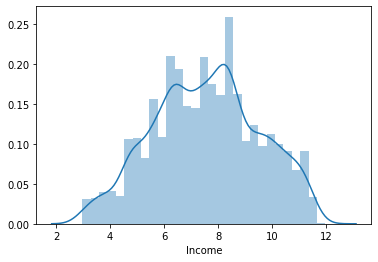

In [43]:
# Transformations for Income values using yeo-johnson method 

pt = PowerTransformer(method = "yeo-johnson", standardize = False)
bank_df['Income'] = pt.fit_transform(bank_df['Income'].values.reshape(-1, 1))
sns.distplot(bank_df['Income'])
plt.show()

#### Observation:
**From the above histogram, we can see that right skewness in Income column is being removed and is in normal distribution**

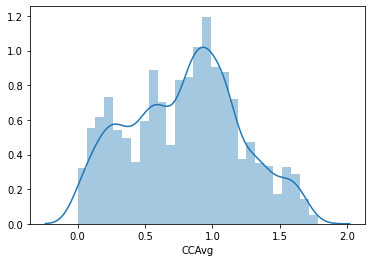

In [44]:
# Transformations for CCAvg values using yeo-johnson method 

pt = PowerTransformer(method = "yeo-johnson", standardize = False)
bank_df['CCAvg'] = pt.fit_transform(bank_df['CCAvg'].values.reshape(-1, 1))
sns.distplot(bank_df['CCAvg'])
plt.show()

#### Observation:
**From the above histogram, we can see that right skewed CCAvg data is being transformed successfully to a normal distributed data**

### Check whether outliers present in Income, CCAvg & Mortgage columns

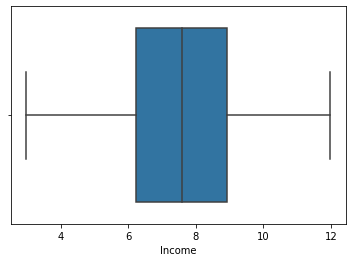

In [45]:
# Checking outliers in Income
sns.boxplot(bank_df['Income'])
plt.show()

#### Observation:
**From the above box-plot, we can see that outliers in the data of Income column are being remove as they are already treated by yeo-johnson transformation method.**

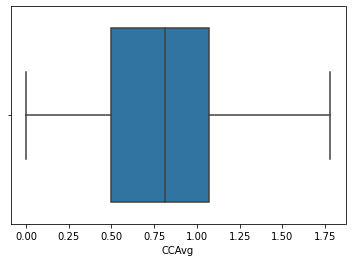

In [46]:
# Checking outliers in CCAvg
sns.boxplot(bank_df['CCAvg'])
plt.show()

#### Observation:
**From the above box-plot, we can see that outliers in the data of CCAvg column are being remove as they are already treated by yeo-johnson transformation method.**

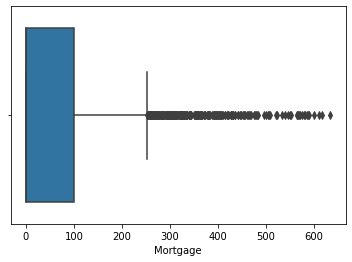

In [47]:
# Checking outliers for Mortgage
sns.boxplot(bank_df['Mortgage'])
plt.show()

#### **Observation:** 
**Here in the above figure we observe that outliers are not removed in mortgage column**

### Quantile-based Flooring and Capping for treating the outliers for Mortgage column
**In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values. The lines of code below print the 10th and 90th percentiles of the variable 'Mortgage', respectively. These values will be used for quantile-based flooring and capping.**

In [48]:
# Removing outlier using Quantile-based Flooring and Capping
q1 = bank_df['Mortgage'].quantile(0.10)
q3 = bank_df['Mortgage'].quantile(0.90)
bank_df['Mortgage'] = np.where(bank_df['Mortgage'] < q1, q1, bank_df['Mortgage'])
bank_df['Mortgage'] = np.where(bank_df['Mortgage'] > q3, q3, bank_df['Mortgage'])
print(bank_df['Mortgage'].skew())

1.1570408846064018


#### Observation:
**we will remove the outliers, as shown in the lines of code above. Finally, we calculate the skewness value again, which comes out much better now.**

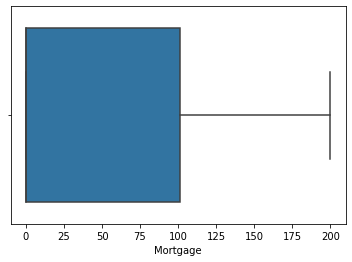

In [49]:
# After removing outliers Mortgage
sns.boxplot(bank_df['Mortgage'])
plt.show()

#### **Observation:**
**From the above graph we conclude that there are outliers in Mortgage data**

### Binning
**Binning method is used to smoothing data or to handle noisy data. In this method, the data is first sorted and then the sorted values are distributed into a number of buckets or bins.**

We used an IntervalIndex as a bin for binning the weight data. The function "cut" can also cope with two other kinds of bin representations:

> **an integer:**
defining the number of equal-width bins in the range of the values "x". The range of "x" is extended by .1% on each side to include the minimum and maximum values of "x".
    
> **sequence of scalars:**
Defines the bin edges allowing for non-uniform width. No extension of the range of "x" is done.

In [50]:
# Transforming Mortgage using binning

bank_df['Mortgage'] = pd.cut(bank_df['Mortgage'], bins = [0,100,200,300,400,500,600,700], labels = [0,1,2,3,4,5,6], include_lowest = True)

#### **Observation:**
**By applying binning for the mortgage data, I was changing, the values in 0's to 0, 100's to 1, 200's to 2 so on. So that the values gets an order for further calculations**

### **NORMALISATION OF DATA**

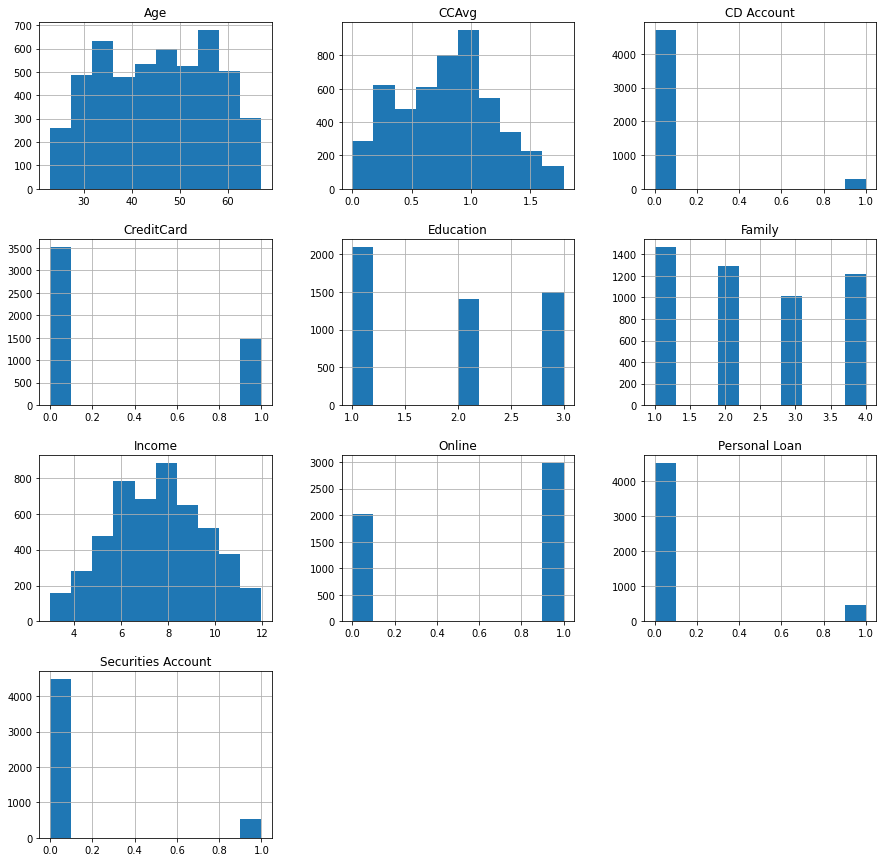

In [51]:
# Checking whether normalization required or not

bank_df.hist(figsize = (15,15))
plt.show()

#### Observation:
**From the above histograms, we can confirm that the outliers are removed and all the data in the columns are correctly skewed**

### Using StandardScaler for normalizing the data

In [52]:
# Normalizing the columns using StandardScaler

obj = StandardScaler()
standard_df = obj.fit_transform(bank_df)
standard_df = pd.DataFrame(standard_df, columns = bank_df.columns)
standard_df.shape

(5000, 11)

In [53]:
standard_df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-0.373939,1.397414,0.119380,-1.049078,-0.579198,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
1,-0.029524,-0.858624,0.525991,0.045136,-1.049078,-0.579198,-0.325875,2.928915,-0.25354,-1.216618,-0.645314
2,-0.552992,-2.068343,-1.216855,-0.392119,-1.049078,-0.579198,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
3,-0.901970,0.725215,-1.216855,0.754006,0.141703,-0.579198,-0.325875,-0.341423,-0.25354,-1.216618,-0.645314
4,-0.901970,-0.491343,1.397414,-0.392119,0.141703,-0.579198,-0.325875,-0.341423,-0.25354,-1.216618,1.549632


### Comparing the graphs of before using StandardScaling and after using it

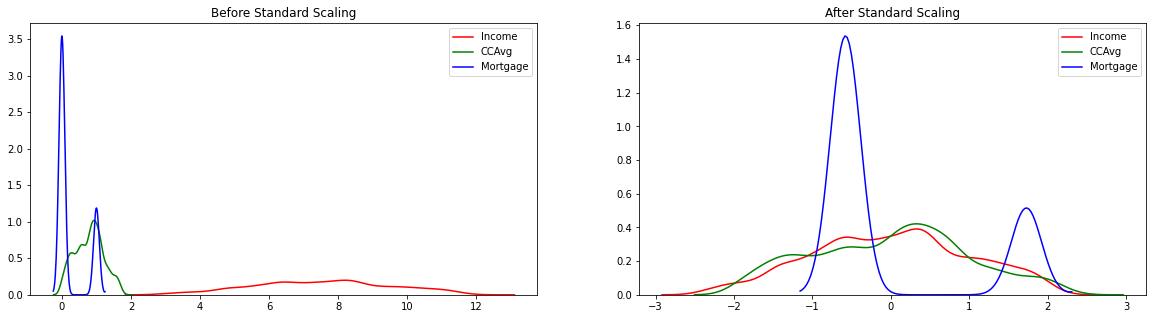

In [54]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (20, 5))

ax1.set_title('Before Standard Scaling')
sns.kdeplot(bank_df['Income'], ax = ax1, color = 'r')
sns.kdeplot(bank_df['CCAvg'], ax = ax1, color = 'g')
sns.kdeplot(bank_df['Mortgage'], ax = ax1, color = 'b')

ax2.set_title('After Standard Scaling')
sns.kdeplot(standard_df['Income'], ax = ax2, color = 'r')
sns.kdeplot(standard_df['CCAvg'], ax = ax2, color = 'g')
sns.kdeplot(standard_df['Mortgage'], ax = ax2, color = 'b')

plt.show()

#### Observation:
**From the above kdeplots, we can see that before applying standard scaling the data is rightly skewed and after removing outliers and applying standard scaling, the data is distributed normally i.e; mean, median and mode are at the center which is normal**

### **SPLITTING THE DATA**

In [55]:
X = standard_df.loc[:, standard_df.columns != "Personal Loan"]
y = standard_df[['Personal Loan']]

In [56]:
print(X.shape, y.shape)

(5000, 10) (5000, 1)


### Applying Label Encoding

**Label encoding is applied to 'y' to change the continuous data into multi-class data for smooth running of the model algorithms**

In [57]:
# Label Encoding

lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)
print(y)

[0 0 0 ... 0 0 0]


**Splitting the data into training and testing and with training size of 0.70 i.e; 70% and testing size of 0.30 i.e; 30%**

In [58]:
# Splitting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [59]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3500, 10) (3500,) (1500, 10) (1500,)


### APPLYING MODELS

### **LOGISTIC REGRESSION**

**Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables**

In [60]:
# Applying logistic regression for building the model

logit_model = LogisticRegression(random_state = 42)
logit_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Printing training score of the logistic model**

In [61]:
print("Percentange of training Score of Logistic model is ",logit_model.score(X_train, y_train) * 100)

Percentange of training Score of Logistic model is  95.65714285714286


**Printing testing score of the logistic model**

In [62]:
print("Percentange of training Score of Logistic model is ",logit_model.score(X_test, y_test) * 100)

Percentange of training Score of Logistic model is  95.6


In [63]:
y_pred = logit_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

**Getting accuracy score using accuracy_score() function**

In [64]:
print("Percentage of accuracy score: ",accuracy_score(y_test, y_pred) * 100)

Percentage of accuracy score:  95.6


### **METRICS FOR LOGISTIC REGRESSION**

### Confusion Matrix
**A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.**

Let's now define the most basic terms, which are whole numbers (not rates):

> **true positives (TP):** These are cases in which we predicted yes (they  have the disease), and they do have the disease.

> **true negatives (TN):** We predicted no, and they don't have the disease.

> **false positives (FP):** We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")

> **false negatives (FN):** We predicted no, but they actually do have the disease. (Also known as a "Type II error.")


In [65]:
#Printing confusion matrix
# The columns will show the instances predicted fro each label,
# and the rows will show the actual number of instances for each label.
cf_matrix = m.confusion_matrix(y_test, y_pred, labels = [0, 1])
cf_matrix

array([[1327,   16],
       [  50,  107]])

#### Observation:
**From the above output, we got TN = 1327, FP = 16, FN = 50, TP = 107**

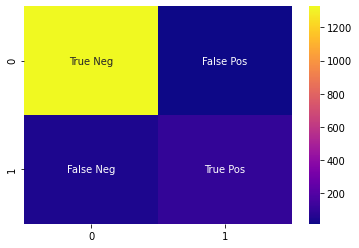

In [66]:
# Confusion matrix visualization
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = "plasma", fmt = "")
plt.show()

#### Observation:
**From the above confusion matrix visualization, we can say that, when the actual value is yes, predicted value is no that is True Negative values are most often by using the Logistic Regression**

### Let us know what is what
**Precision:**
There are many cases in which classification accuracy is not a good indicator of the model performance. One of these scenarios is when the class distribution is imbalanced (one class is more frequent than others). In this case, even if you predict all samples as the most frequent class you would get a high accuracy rate, which does not make sense at all (because your model is not learning anything, and is just predicting everything as the top class).

**Precision = True_Positive/ (True_Positive+ False_Positive)**


**Recall:**
Recall is another important metric, which is defined as the fraction of samples from a class which are correctly predicted by the model. More formally:

**Recall = True_Positive/ (True_Positive+ False_Negative)**


**F1 Score:**
Depending on application, you may want to give higher priority to recall or precision. But there are many applications in which both recall and precision are important. Therefore, it is natural to think of a way to combine these two into a single metric. One popular metric which combines precision and recall is called F1-score, which is the harmonic mean of precision and recall defined as:**

**F1-score = 2*Precision*Recall/(Precision+Recall)**

In [67]:
# Printing the precision and recall, among other metrics
prec_rec = m.classification_report(y_test, y_pred, labels = [0, 1])
print(prec_rec)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1343
           1       0.87      0.68      0.76       157

    accuracy                           0.96      1500
   macro avg       0.92      0.83      0.87      1500
weighted avg       0.95      0.96      0.95      1500



#### Observation:
**From the above analysis, precision (when it predicts yes, how often is it correct?) is most accurate for 0 than 1**

**Recall is also more accurate for 0 than 1**

**f1-score (this is weighted average of the recall and precision) is also more accurate for 0 than 1**

*Here, 0 means customers having personal loans, 1 means customers not having personal loans*

### **ROC Curve:**
The receiver operating characteristic curve is plot which shows the performance of a binary classifier as function of its cut-off threshold. It essentially shows the true positive rate (TPR) against the false positive rate (FPR) for various threshold values.

**Note:** The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In [68]:
auc_roc = roc_auc_score(y_test, y_pred)
print("ROC_AUC_score : ", auc_roc)

ROC_AUC_score :  0.8348075181052023


In [69]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8348075181052023

Text(0.5, 0, 'False Positive Rate')

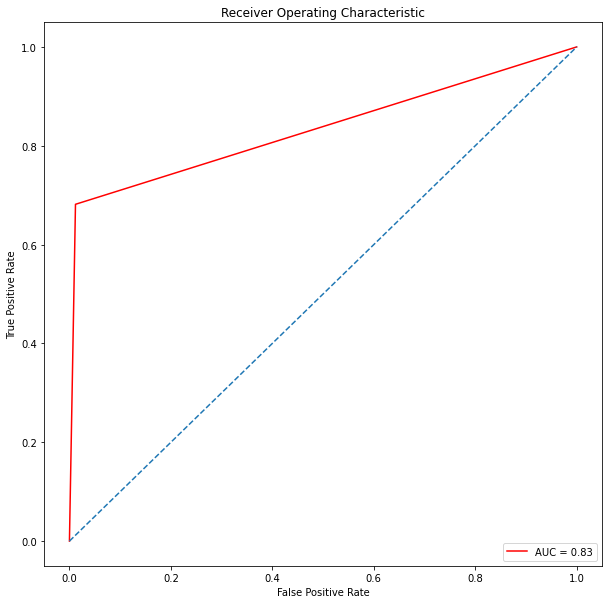

In [70]:

plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2F' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Observation:
**From the above analysis, ROC & AUC score: 0.8348**

**It's proved by visualization by plotting a graph with x-axis, False Positive Rate and y-axis, True Positive Rate**

### **KNN (K - NEAREST NEIGHBORS)**

**KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry. To evaluate any technique we generally look at 3 important aspects:**

1. Ease to interpret output

2. Calculation time

3. Predictive Power

In [72]:
knn_model = KNeighborsClassifier(n_neighbors = 21, weights = 'uniform', metric = 'euclidean')
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [73]:
print("Percentage of training score: ",knn_model.score(X_train, y_train) * 100)

Percentage of training score:  94.62857142857143


In [74]:
print("Percentage of testing score: ",knn_model.score(X_test, y_test) * 100)

Percentage of testing score:  93.66666666666667


In [75]:
y_pred = knn_model.predict(X_test)

In [76]:
y_pred[:5]

array([0, 0, 0, 0, 0])

In [77]:
print("Percentage of accuracy score: ",accuracy_score(y_test, y_pred) * 100)

Percentage of accuracy score:  93.66666666666667


### METRICS FOR KNN (K - Nearest Neighbors)

### Confusion Matrix

In [78]:
#Printing confusion matrix
# The columns will show the instances predicted fro each label,
# and the rows will show the actual number of instances for each label.
cf_matrix = m.confusion_matrix(y_test, y_pred, labels = [0, 1])
cf_matrix

array([[1337,    6],
       [  89,   68]])

#### Observation:
**From the above output, we got TN = 1337, FP = 6, FN = 89, TP = 68**

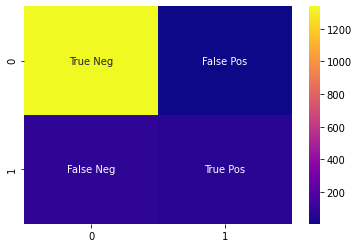

In [79]:
# Confusion matrix visualization
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = "plasma", fmt = "")
plt.show()

#### Observation:
**From the above confusion matrix visualization, we can say that, when the actual value is yes, predicted value is no that is True Negative values are most often by using the knn algorithm**

In [80]:
# Printing the precision and recall, among other metrics
prec_rec = m.classification_report(y_test, y_pred, labels = [0, 1])
print(prec_rec)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1343
           1       0.92      0.43      0.59       157

    accuracy                           0.94      1500
   macro avg       0.93      0.71      0.78      1500
weighted avg       0.94      0.94      0.93      1500



#### Observation:
**From the above analysis, precision (when it predicts yes, how often is it correct?) is most accurate for 0 than 1**

**Recall is also more accurate for 0 than 1**

**f1-score (this is weighted average of the recall and precision) is also more accurate for 0 than 1**

*Here, 0 means customers having personal loans, 1 means customers not having personal loans*

### **ROC Curve:**

In [81]:
print("ROC_AUC_score : ", roc_auc_score(y_test, y_pred))

ROC_AUC_score :  0.7143267046397693


In [82]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7143267046397693

Text(0.5, 0, 'False Positive Rate')

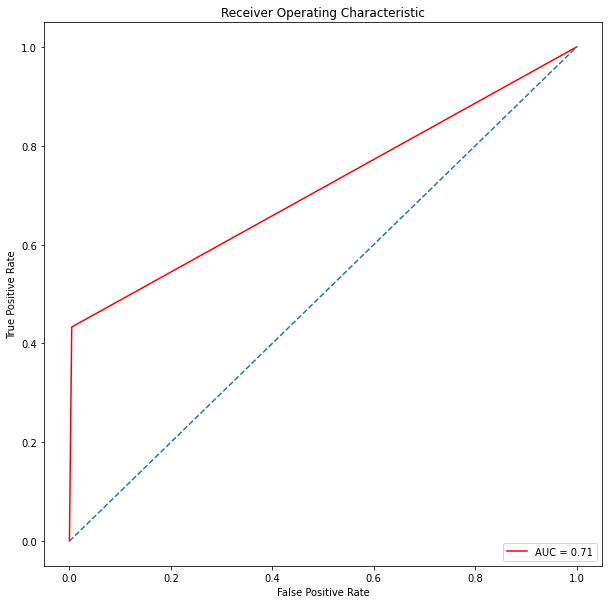

In [84]:
plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2F' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Observation:
**From the above analysis, ROC & AUC score: 0.7143**

**It's proved by visualization by plotting a graph with x-axis, False Positive Rate and y-axis, True Positive Rate**

### **DECISION TREE CLASSIFIER**

**Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label**

In [85]:
dt_model = DecisionTreeClassifier(max_depth = 10,random_state = 42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [86]:
print("Percentage of training score: ",dt_model.score(X_train, y_train) * 100)

Percentage of training score:  99.94285714285715


In [87]:
print("Percentage of testing score: ",dt_model.score(X_test, y_test) * 100)

Percentage of testing score:  98.2


In [88]:
y_pred = dt_model.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 0])

In [89]:
print("Percentage of accuracy score: ",accuracy_score(y_test, y_pred)*100)

Percentage of accuracy score:  98.2


### METRICS FOR DECISION TREE CLASSIFIER

### Confusion Matrix

In [90]:
#Printing confusion matrix
# The columns will show the instances predicted fro each label,
# and the rows will show the actual number of instances for each label.
cf_matrix = m.confusion_matrix(y_test, y_pred, labels = [0, 1])
cf_matrix

array([[1332,   11],
       [  16,  141]])

#### Observation:
**From the above output, we got TN = 1332, FP = 11, FN = 16, TP = 141**

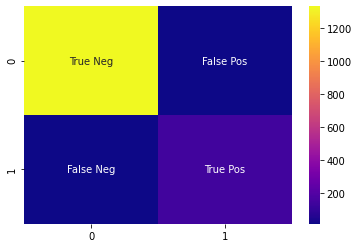

In [91]:
# Confusion matrix visualization
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = "plasma", fmt = "")
plt.show()

#### Observation:
**From the above confusion matrix visualization, we can say that, when the actual value is yes, predicted value is no that is True Negative values are most often by using the Decision tree classifier**

In [92]:
# Printing the precision and recall, among other metrics
prec_rec = m.classification_report(y_test, y_pred, labels = [0, 1])
print(prec_rec)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.93      0.90      0.91       157

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



#### Observation:
**From the above analysis, precision (when it predicts yes, how often is it correct?) is almost nearer for both 0 and 1**

**Recall is accurate for 0 than 1**

**f1-score (this is weighted average of the recall and precision) is accurate for 0 than 1**

*Here, 0 means customers having personal loans, 1 means customers not having personal loans*

### **ROC Curve:**

In [93]:
print("ROC_AUC_score : ", roc_auc_score(y_test, y_pred))

ROC_AUC_score :  0.9449492769775814


In [95]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9449492769775814

Text(0.5, 0, 'False Positive Rate')

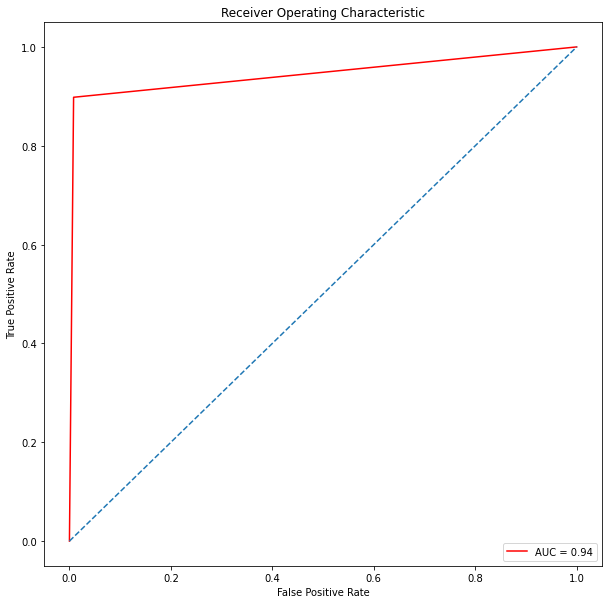

In [96]:

plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2F' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Observation:
**From the above analysis, ROC & AUC score: 0.9449**

**It's proved by visualization by plotting a graph with x-axis, False Positive Rate and y-axis, True Positive Rate**

### **NAIVE BAYES CLASSIFIER**

**Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.**

In [99]:
N_model = GaussianNB()
N_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [101]:
print("Percentage of training score: ",N_model.score(X_train, y_train) * 100)

Percentage of training score:  92.74285714285713


In [103]:
print("Percentage of testing score: ",N_model.score(X_test, y_test) * 100)

Percentage of testing score:  92.80000000000001


In [104]:
y_pred = N_model.predict(X_test)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [105]:
print("Percentage of accuracy score : ",accuracy_score(y_test, y_pred)*100)

Percentage of accuracy score :  92.80000000000001


### METRICS FOR NAIVE BAYES

### Confusion Matrix

In [106]:
#Printing confusion matrix
# The columns will show the instances predicted fro each label,
# and the rows will show the actual number of instances for each label.
cf_matrix = m.confusion_matrix(y_test, y_pred, labels = [0, 1])
cf_matrix

array([[1305,   38],
       [  70,   87]])

#### Observation:
**From the above output, we got TN = 1305, FP = 38, FN = 70, TP = 87**

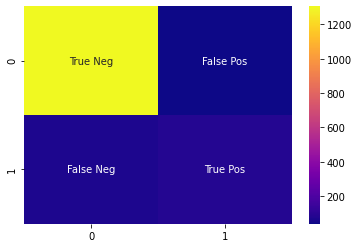

In [107]:
# Confusion matrix visualization
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = "plasma", fmt = "")
plt.show()

#### Observation:
**From the above confusion matrix visualization, we can say that, when the actual value is yes, predicted value is no that is True Negative values are most often by using the Naive bayes algorithm**

In [108]:
# Printing the precision and recall, among other metrics
prec_rec = m.classification_report(y_test, y_pred, labels = [0, 1])
print(prec_rec)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.70      0.55      0.62       157

    accuracy                           0.93      1500
   macro avg       0.82      0.76      0.79      1500
weighted avg       0.92      0.93      0.92      1500



#### Observation:
**From the above analysis, precision (when it predicts yes, how often is it correct?) is most accurate for 0 than 1**

**Recall is also more accurate for 0 than 1**

**f1-score (this is weighted average of the recall and precision) is also more accurate for 0 than 1**

*Here, 0 means customers having personal loans, 1 means customers not having personal loans*

### **ROC Curve:**

In [109]:
print("ROC_AUC_score : ", roc_auc_score(y_test, y_pred))

ROC_AUC_score :  0.7629226325699191


In [110]:

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7629226325699191

Text(0.5, 0, 'False Positive Rate')

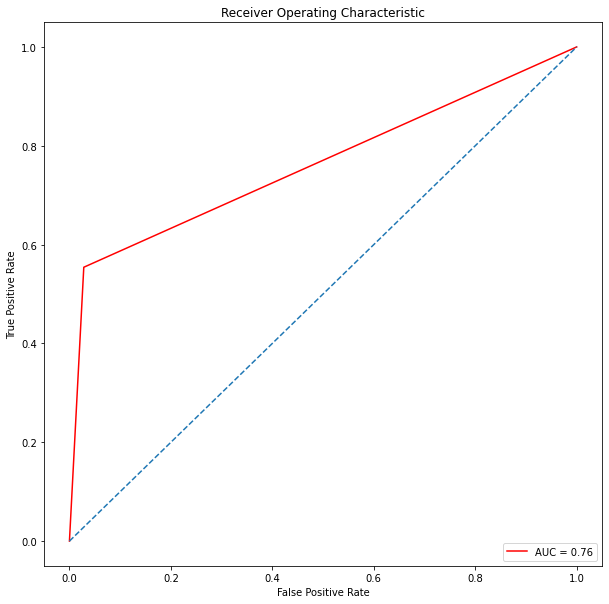

In [111]:

plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2F' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Observation:
**From the above analysis, ROC & AUC score: 0.7629**

**It's proved by visualization by plotting a graph with x-axis, False Positive Rate and y-axis, True Positive Rate**

### **RANDOM FOREST CLASSIFIER**

In [115]:
rf_model = RandomForestClassifier(random_state = 42, criterion = "entropy", max_depth=10)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [116]:
print("Percentage of training score: ",rf_model.score(X_train, y_train) * 100)

Percentage of training score:  99.88571428571429


In [117]:
print("Percentage of testing score: ",rf_model.score(X_test, y_test)* 100)

Percentage of testing score:  98.93333333333332


In [118]:
y_pred = rf_model.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 0])

In [119]:
print("Percentage of accuracy score: ",accuracy_score(y_test, y_pred)* 100)

Percentage of accuracy score:  98.93333333333332


### METRICS FOR RANDOM FOREST

### Confusion Matrix

In [120]:
#Printing confusion matrix
# The columns will show the instances predicted fro each label,
# and the rows will show the actual number of instances for each label.
cf_matrix = m.confusion_matrix(y_test, y_pred, labels = [0, 1])
cf_matrix

array([[1341,    2],
       [  14,  143]])

#### Observation:
**From the above output, we got TN = 1341, FP = 2, FN = 14, TP = 143**

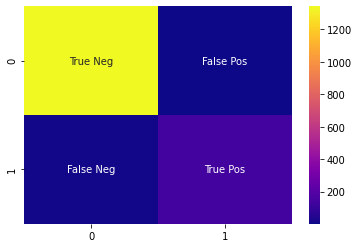

In [121]:
# Confusion matrix visualization
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = "plasma", fmt = "")
plt.show()

#### Observation:
**From the above confusion matrix visualization, we can say that, when the actual value is yes, predicted value is no that is True Negative values are most often by using the Random forest alogrithm**

In [122]:
# Printing the precision and recall, among other metrics
prec_rec = m.classification_report(y_test, y_pred, labels = [0, 1])
print(prec_rec)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1343
           1       0.99      0.91      0.95       157

    accuracy                           0.99      1500
   macro avg       0.99      0.95      0.97      1500
weighted avg       0.99      0.99      0.99      1500



#### Observation:
**From the above analysis, precision (when it predicts yes, how often is it correct?) is same to both 0 and 1**

**Recall is more accurate for 0 than 1**

**f1-score (this is weighted average of the recall and precision) is nearly same for both 0 than 1**

*Here, 0 means customers having personal loans, 1 means customers not having personal loans*

### **ROC Curve:**

In [123]:
print("ROC_AUC_score : ", roc_auc_score(y_test, y_pred))

ROC_AUC_score :  0.9546694111007299


In [124]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9546694111007299

Text(0.5, 0, 'False Positive Rate')

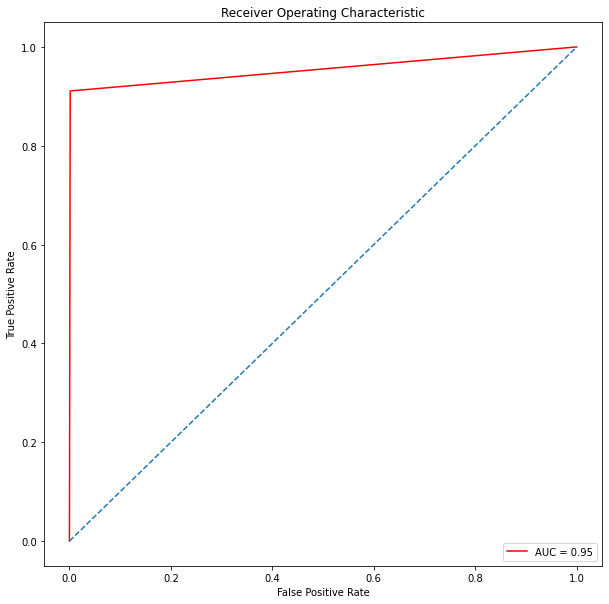

In [125]:
plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2F' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Observation:
**From the above analysis, ROC & AUC score: 0.9546**

**It's proved by visualization by plotting a graph with x-axis, False Positive Rate and y-axis, True Positive Rate**

### **SUPPORT VECTOR CLASSIFIER**

In [126]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [127]:
print("Percentage of Training score: ", svc_model.score(X_train, y_train) * 100)

Percentage of Training score:  97.97142857142858


In [128]:
print("Percentage of Testing score: ", svc_model.score(X_test, y_test) * 100)

Percentage of Testing score:  96.93333333333334


In [129]:
y_pred = svc_model.predict(X_test)
y_pred[:5]

array([0, 1, 0, 0, 0])

In [130]:
print("Percentage of accuracy score: ", accuracy_score(y_test, y_pred) * 100)

Percentage of accuracy score:  96.93333333333334


### METRICS FOR SUPPORT VECTOR MACHINE

### Confusion Matrix

In [131]:
#Printing confusion matrix
# The columns will show the instances predicted fro each label,
# and the rows will show the actual number of instances for each label.
cf_matrix = m.confusion_matrix(y_test, y_pred, labels = [0, 1])
cf_matrix

array([[1340,    3],
       [  43,  114]])

#### Observation:
**From the above output, we got TN = 1340, FP = 3, FN = 43, TP = 114**

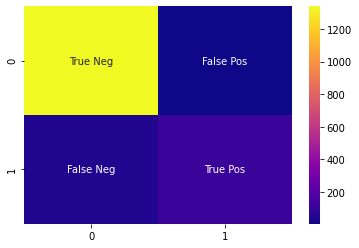

In [132]:
# Confusion matrix visualization
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, cmap = "plasma", fmt = "")
plt.show()

#### Observation:
**From the above confusion matrix visualization, we can say that, when the actual value is yes, predicted value is no that is True Negative values are most often by using the support vector machine alogrithm**

In [133]:
# Printing the precision and recall, among other metrics
prec_rec = m.classification_report(y_test, y_pred, labels = [0, 1])
print(prec_rec)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1343
           1       0.97      0.73      0.83       157

    accuracy                           0.97      1500
   macro avg       0.97      0.86      0.91      1500
weighted avg       0.97      0.97      0.97      1500



#### Observation:
**From the above analysis, precision (when it predicts yes, how often is it correct?) is same to both 0 and 1**

**Recall is more accurate for 0 than 1**

**f1-score (this is weighted average of the recall and precision) is more accurate for 0 than 1**

*Here, 0 means customers having personal loans, 1 means customers not having personal loans*

### **ROC Curve:**

In [134]:
print("ROC_AUC_score : ", roc_auc_score(y_test, y_pred))

ROC_AUC_score :  0.8619404223835787


In [135]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8619404223835787

Text(0.5, 0, 'False Positive Rate')

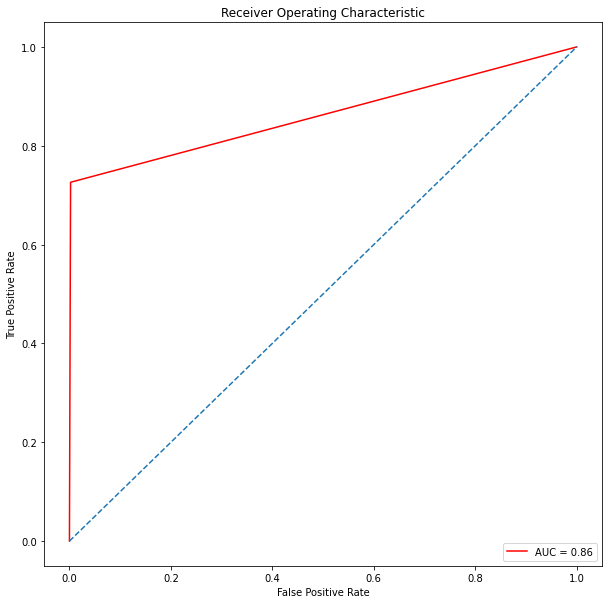

In [136]:
plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2F' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#### Observation:
**From the above analysis, ROC & AUC score: 0.8619**
**It's proved by visualization by plotting a graph with x-axis, False Positive Rate and y-axis, True Positive Rate**

### COMPARING THE PERFORMANCE OF MODELS

### Comparing using boxplot

In [137]:
X = bank_df.drop(['Personal Loan'], axis = 1)
y = bank_df.pop('Personal Loan')

In [140]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))

# Evaluating each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 12345)
    cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.958600 (0.008393)
DT: 0.983400 (0.002375)
NB: 0.924400 (0.005499)
RF: 0.987000 (0.004494)
SVC: 0.904000 (0.012522)
LR: 0.952400 (0.006248)


### Box plot algorithm comparison

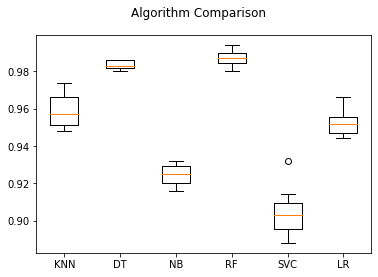

In [141]:
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Observation:
**Above, after using six classification models, from the graph of boxplot, it seems like *Random Forest* algorithm have the highest accuracy and we can choose that as our final model.**

### CONCLUSIVE PERFORMANCE EVALUATION IN TABULAR FORMAT

In [142]:
# Define dictionary with performace metrics
scoring  = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score': make_scorer(f1_score)}

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter = 10000)
svm_model = SVC()
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
knn_model = KNeighborsClassifier()

# Define the models evaluation function
def models_evaluation(X, y, folds):
    '''
     X : data set features
     y : data set target
     folds : no.of cross-validation folds
     
    '''
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svm_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    knn = cross_validate(knn_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                        'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()],
                                       'K-Nearest Neighbors Classifier' : [knn['test_accuracy'].mean(),
                                                                          knn['test_precision'].mean(),
                                                                          knn['test_recall'].mean(),
                                                                          knn['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
   

#### TABLE 1

In [143]:
# Run models_evaluation function
table_1 = models_evaluation(X, y, 5)
table_1

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,K-Nearest Neighbors Classifier,Best Score
Accuracy,0.953000,0.904,0.982000,0.986400,0.924600,0.960400,Random Forest
Precision,0.826064,0.000,0.913613,0.968916,0.628781,0.966599,Random Forest
Recall,0.647917,0.000,0.897917,0.887500,0.516667,0.608333,Decision Tree
F1 Score,0.725894,0.000,0.905423,0.925992,0.566758,0.746628,Random Forest


### Outcome Interpretation
**According to the results from the table above, the Random Forest classifier obtained the best accuracy, precision and f1 scores, and the second best recall score, making it the most reliable machine learning classifier for this data set. On the other hand, it can be stated that the Gaussian Naive Bayes, knn classifier models had the poorest performance, and thus, are not reliable classification models for the data set.**

### BUSINESS UNDERSTANDING OF MODEL:

    ********************************************************************************************************************
    ********************************************************************************************************************
    
    ## TABLE 1 is in the above cell.
    
    Understanding all the models after calculating their training score, testing score, accuracy score and confusion 
    matrix which are main reliable factors for getting a conclusion from the study, we take a tabular view (TABLE 2) of
    all the data collected from the results of above classification models.
    
    ## TABLE 2 :
    --------------------------------------------------------------------------------------------------------------------
    |         MODEL          |  Train score  |   Test score  |   Accuracy score    |   Confusion Matrix  |   Remarks   |
    --------------------------------------------------------------------------------------------------------------------
    | Logistic Regression    |   95.71 %     |   95.6 %      |    95.6 %           |     [[1327,   16],  |   Average   |
    |                        |               |               |                     |     [  50,  107]]   |             |
    --------------------------------------------------------------------------------------------------------------------
    | K-Nearest Neighbors    |   94.62 %     |   93.66 %     |    93.66 %          |     [[1337,    6],  |    Poor     |
    | Classifier             |               |               |                     |     [  89,   68]]   |             |
    --------------------------------------------------------------------------------------------------------------------
    | Decision Tree          |   99.94 %     |   98.2 %      |    98.2 %           |     [[1332,   11],  |   Better    |
    | Classifier             |               |               |                     |     [  16,  141]]   |             |
    --------------------------------------------------------------------------------------------------------------------
    | Naive Bayes            |   92.74 %     |   92.80 %     |    92.80 %          |     [[1305,   38],  |    Poor     |
    |                        |               |               |                     |     [  70,   87]]   |             |
    --------------------------------------------------------------------------------------------------------------------
    | Random Forest          |   99.88 %     |   98.93 %     |    98.93 %          |     [[1341,    2],  |    Best     |
    | Classifier             |               |               |                     |     [  14,  143]]   |             |
    --------------------------------------------------------------------------------------------------------------------
    | Support Vector         |   97.97 %     |   96.93 %     |    96.93 %          |     [[1340,    3],  |    Good     |
    | Classifier             |               |               |                     |     [  43,  114]]   |             |
    --------------------------------------------------------------------------------------------------------------------
    
    Evaluating through comparing training and testing score along with the accuracy scores of the models, we can make a 
    conclusion that, it seems to have the best performance for Random Forest Classifier model as it has the highest 
    accuracy score of 98.93 %.
    From the table 1, we have already interpreted from precision, recall and f1 scores that Random Forest classifier 
    stood top in all other algorithms. 
    
    Basically, Decision Tree Classifier can be also taken into account after Random Forest Classifier. As Decision Tree 
    is second accurate classification model for the given data.
    
    # AIM:
    The main aim of the bank is to convert the liability customers to loan customers. They want to set up a new 
    marketing campaign. Hence, they need information about the connection between the variables given in the data.
    
    # OBJECTIVE:
    The classification goal is to predict the likelihood of a liability customer buying personal loans.
    
    # PROCEDURE DONE:
    Gathered all the required and implementable classification models and trained & tested the models and studied their 
    conclusions. TABLE 1 and TABLE 2 are filled with gathered and researched information from:
               # Univariate Analysis
               # Bivariate Analysis
               # Multivariate Analysis
               # Data visualizations in model building
    Thus, treating with all necessary libraries, classification models and making conclusions as the best fit model for
    "Marketing Campaign for Banking Products" problem.
    
    # MODEL ACCURACY HIERARCHY:
    --------------------------------------------------------------------------------------------------------------------
                          |                    RANDOM FOREST CLASSIFIER                    |
                          ------------------------------------------------------------------
                              |                DECISION TREE CLASSIFIER                 |
                              -----------------------------------------------------------
                                  |           SUPPORT VECTOR CLASSIFIER              |
                                  ----------------------------------------------------
                                      |          LOGISTIC REGRESSION              |
                                      ---------------------------------------------
                                         |   K-NEAREST NEIGHBORS CLASSIFIER    |
                                         ---------------------------------------
                                             |    NAIVE BAYES CLASSIFIER    |
                                             --------------------------------
    
    # GRAPHICAL CONCLUSIONS:
    From the bivariate analysis graphs, the relational count plots of
                    # Income and Education w.r.t Personal Loan
                    # Mortgage and Education w.r.t Personal Loan
                    # No.of family members w.r.t Personal Loan
    Makes more reasonable observations that they should be considered for the business understanding while discussing 
    about a new campaign for converting the liabilily customers to personal loan customers.
    (Here, w.r.t means with respect to)
    
    # RESULT:
    --------------------------------------------------------------------------------------------------------------------
    >>>>>>>>>>>>>>>>>>>>>>>     USE RANDOM FOREST CLASSIFIER FOR THE CLASSIFICATION GOAL     <<<<<<<<<<<<<<<<<<<<<<<<<<<
    >>>>>>>>>>>>>>>>>>>>>>>>>>>>        TO PREDICT THE LIKELIHOOD OF A LIABILITY       <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>    CUSTOMER BUYING PERSONAL LOAN    <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    
    =================================     GIVEN OBJECTIVE IS SOLVED AND PROOVED     ====================================
    
    ********************************************************************************************************************
    ********************************************************************************************************************